# Python Pandas

In [1]:
palette = "Spectral"

# 1. Data Preparation

## 1.1 Philadelphia 2019

### Trip Data

In [2]:
# import all necessary packages
import pandas as pd
import numpy as np
import json
import datetime
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
#from datetime import datetime

In [3]:
# import dataset
dfPhiladelphia = pd.read_csv("data/philadelphia_2019.csv")
dfPhiladelphia.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park"
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park"
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center"
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge


In [4]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744260 entries, 0 to 744259
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          744260 non-null  object
 1   end_time            744260 non-null  object
 2   start_station_id    744260 non-null  int64 
 3   end_station_id      744260 non-null  int64 
 4   bike_id             744260 non-null  int64 
 5   user_type           744225 non-null  object
 6   start_station_name  744260 non-null  object
 7   end_station_name    744260 non-null  object
dtypes: int64(3), object(5)
memory usage: 45.4+ MB


In [5]:
# Test if null values are existing in dfPhiladelphia
len(dfPhiladelphia)-len(dfPhiladelphia.dropna())

35

There are 35 rows with null values existing in dfPhiladelphia (but just in column user_type)

In [6]:
# Drop rows with null values
dfPhiladelphia.dropna(inplace=True)

In [7]:
# Test if duplicate rows are existing in dfPhiladelphia
len(dfPhiladelphia)-len(dfPhiladelphia.drop_duplicates())

196

There are 196 duplicates in dfPhiladelphia.
Since no bike (unique bike_id) can be rented more than once at the same time we will drop the duplicates

In [8]:
# Drop duplicate rows
dfPhiladelphia.drop_duplicates(inplace=True)

In [9]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744029 entries, 0 to 744259
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          744029 non-null  object
 1   end_time            744029 non-null  object
 2   start_station_id    744029 non-null  int64 
 3   end_station_id      744029 non-null  int64 
 4   bike_id             744029 non-null  int64 
 5   user_type           744029 non-null  object
 6   start_station_name  744029 non-null  object
 7   end_station_name    744029 non-null  object
dtypes: int64(3), object(5)
memory usage: 51.1+ MB


In [10]:
# use the correct datatypes for the columns "start_time" and "end_time"
dfPhiladelphia['start_time'] = pd.to_datetime(dfPhiladelphia['start_time'])
dfPhiladelphia['end_time'] = pd.to_datetime(dfPhiladelphia['end_time'])

In [11]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744029 entries, 0 to 744259
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          744029 non-null  datetime64[ns]
 1   end_time            744029 non-null  datetime64[ns]
 2   start_station_id    744029 non-null  int64         
 3   end_station_id      744029 non-null  int64         
 4   bike_id             744029 non-null  int64         
 5   user_type           744029 non-null  object        
 6   start_station_name  744029 non-null  object        
 7   end_station_name    744029 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 51.1+ MB


In [12]:
# split date and time for start_time and end_time, but keep nonsplited for the weather data merge
dfPhiladelphia['start_time_for_weather_merge'] = dfPhiladelphia['start_time']
dfPhiladelphia['end_time_for_weather_merge'] = dfPhiladelphia['end_time']
dfPhiladelphia['start_date'] = dfPhiladelphia['start_time'].dt.round("H").dt.date
dfPhiladelphia['end_date'] = dfPhiladelphia['end_time'].dt.round("H").dt.date

dfPhiladelphia.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_for_weather_merge,end_time_for_weather_merge,start_date,end_date
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",2019-01-01 00:19:00,2019-01-01 00:27:00,2019-01-01,2019-01-01
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",2019-01-01 00:30:00,2019-01-01 00:37:00,2019-01-01,2019-01-01
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,2019-01-01 00:52:00,2019-01-01 01:05:00,2019-01-01,2019-01-01
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",2019-01-01 00:55:00,2019-01-01 01:04:00,2019-01-01,2019-01-01
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,2019-01-01 01:05:00,2019-01-01 01:17:00,2019-01-01,2019-01-01


In [13]:
# Rounding time of dfPhiladelphia to hour
dfPhiladelphia['start_time_for_weather_merge'] = dfPhiladelphia["start_time_for_weather_merge"].dt.round("H")
dfPhiladelphia['end_time_for_weather_merge'] = dfPhiladelphia["end_time_for_weather_merge"].dt.round("H")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_for_weather_merge,end_time_for_weather_merge,start_date,end_date
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01,2019-01-01
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",2019-01-01 00:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
744255,2019-12-31 23:28:50,2020-01-01 00:15:08,3192,3070,16508,Indego365,2nd & Fairmount,"Spring Garden Station, MFL",2019-12-31 23:00:00,2020-01-01 00:00:00,2019-12-31,2020-01-01
744256,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,2019-12-31 23:00:00,2020-01-01 00:00:00,2019-12-31,2020-01-01
744257,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01,2020-01-01
744258,2019-12-31 23:52:44,2020-01-01 00:01:31,3182,3028,17805,Indego365,17th & Sansom,4th & Bainbridge,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01,2020-01-01


In [14]:
#maybe change datatype of station names and user type to string

In [15]:
# Is the feature user_type valuable for our task? What values are inside?
dfPhiladelphia["user_type"].unique()

array(['Indego30', 'Day Pass', 'Indego365', 'IndegoFlex', 'Walk-up'],
      dtype=object)

Drop features we won't need for all the other tasks
(bike_id?, start_station_name, end_station_name)

In [16]:
#...

### Station Data (Coordinates)

In this section we will:
 - import the coordination data (latitude & longitude) for each station_id
 - merge latitude & longitude into dfPhiladelphia (merge over station_id)

In [17]:
# load station data using Python JSON module
with open('data/stations.json','r') as f:
    stations = json.loads(f.read())
# Flatten data
dfStations = pd.json_normalize(stations, record_path =['features'])
dfStations

,type,geometry.coordinates,geometry.type,properties.id,properties.name,properties.coordinates,properties.totalDocks,properties.docksAvailable,properties.bikesAvailable,properties.classicBikesAvailable,...,properties.isEventBased,properties.isVirtual,properties.kioskId,properties.notes,properties.openTime,properties.publicText,properties.timeZone,properties.trikesAvailable,properties.latitude,properties.longitude
0,Feature,"[-75.16374, 39.95378]",Point,3004,Municipal Services Building Plaza,"[-75.16374, 39.95378]",30,7,22,18,...,False,False,3004,None,None,,None,0,39.95378,-75.16374
1,Feature,"[-75.14403, 39.94733]",Point,3005,"Welcome Park, NPS","[-75.14403, 39.94733]",13,4,8,5,...,False,False,3005,None,None,,None,0,39.94733,-75.14403
2,Feature,"[-75.20311, 39.9522]",Point,3006,40th & Spruce,"[-75.20311, 39.9522]",17,13,3,0,...,False,False,3006,None,None,,None,0,39.95220,-75.20311
3,Feature,"[-75.15993, 39.94517]",Point,3007,"11th & Pine, Kahn Park","[-75.15993, 39.94517]",20,16,4,3,...,False,False,3007,None,None,,None,0,39.94517,-75.15993
4,Feature,"[-75.15067, 39.98081]",Point,3008,Temple University Station,"[-75.15067, 39.98081]",17,9,8,2,...,False,False,3008,None,None,,None,0,39.98081,-75.15067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Feature,"[-75.16027, 39.95028]",Point,3295,12th & Chestnut,"[-75.16027, 39.95028]",21,12,9,4,...,False,False,3295,None,None,,None,0,39.95028,-75.16027
183,Feature,"[-75.16758, 39.95134]",Point,3296,16th & Chestnut,"[-75.16758, 39.95134]",21,16,4,1,...,False,False,3296,None,None,,None,0,39.95134,-75.16758
184,Feature,"[-75.20691, 39.94717]",Point,3298,42nd & Woodland,"[-75.20691, 39.94717]",21,17,4,0,...,False,False,3298,None,None,,None,0,39.94717,-75.20691
185,Feature,"[-75.15698, 39.94332]",Point,3299,9th & Lombard,"[-75.15698, 39.94332]",22,14,8,5,...,False,False,3299,None,None,,None,0,39.94332,-75.15698


In [18]:
dfStations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   type                               187 non-null    object 
 1   geometry.coordinates               187 non-null    object 
 2   geometry.type                      187 non-null    object 
 3   properties.id                      187 non-null    int64  
 4   properties.name                    187 non-null    object 
 5   properties.coordinates             187 non-null    object 
 6   properties.totalDocks              187 non-null    int64  
 7   properties.docksAvailable          187 non-null    int64  
 8   properties.bikesAvailable          187 non-null    int64  
 9   properties.classicBikesAvailable   187 non-null    int64  
 10  properties.smartBikesAvailable     187 non-null    int64  
 11  properties.electricBikesAvailable  187 non-null    int64  

In [19]:
dfStations = pd.DataFrame(dfStations, columns=['properties.id','properties.latitude','properties.longitude'])
dfStations.rename(columns={"properties.id": "station_id"}, inplace = True)
dfStations.rename(columns={"properties.latitude": "latitude"}, inplace = True)
dfStations.rename(columns={"properties.longitude": "longitude"}, inplace = True)
dfStations

,station_id,latitude,longitude
0,3004,39.95378,-75.16374
1,3005,39.94733,-75.14403
2,3006,39.95220,-75.20311
3,3007,39.94517,-75.15993
4,3008,39.98081,-75.15067
...,...,...,...
182,3295,39.95028,-75.16027
183,3296,39.95134,-75.16758
184,3298,39.94717,-75.20691
185,3299,39.94332,-75.15698


In [20]:
dfStations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  187 non-null    int64  
 1   latitude    187 non-null    float64
 2   longitude   187 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.5 KB


In [21]:
#dfStations['longitude'], dfStations['latitude'] = zip(*dfStations['geometry.coordinates'])

In [22]:
dfStations.tail(70)

,station_id,latitude,longitude
117,3187,39.95725,-75.17232
118,3188,39.90471,-75.17340
119,3190,39.94892,-75.16991
120,3196,39.98717,-75.17477
121,3197,39.92083,-75.17033
...,...,...,...
182,3295,39.95028,-75.16027
183,3296,39.95134,-75.16758
184,3298,39.94717,-75.20691
185,3299,39.94332,-75.15698


#### Are all station coordinates we need in dfStations?

Let's see first for which stations we need coordinates:

In [23]:
# Get all unique start_station_id values in dfPhiladelphia
unique_start_station_ids_in_dfPhiladelphia = dfPhiladelphia["start_station_id"].unique()

# Get all unique end_station_id values in dfPhiladelphia
unique_end_station_ids_in_dfPhiladelphia = dfPhiladelphia["end_station_id"].unique()

# Concatenate unique start_station_id values and unique end_station_id values, afterwards show only unique values
unique_station_ids_in_dfPhiladelphia = np.sort(np.unique(np.concatenate((unique_start_station_ids_in_dfPhiladelphia, unique_end_station_ids_in_dfPhiladelphia))))

print(unique_station_ids_in_dfPhiladelphia, "\n\nThis are all Station_ids in dfPhiladelphia we need coordinates for.")

[3000 3004 3005 3006 3007 3008 3009 3010 3011 3012 3013 3014 3015 3016
 3017 3018 3019 3020 3021 3022 3024 3025 3026 3027 3028 3029 3030 3031
 3032 3033 3034 3035 3036 3037 3038 3039 3040 3041 3042 3043 3045 3046
 3047 3049 3050 3051 3052 3053 3054 3055 3056 3057 3058 3059 3060 3061
 3062 3063 3064 3065 3066 3067 3068 3069 3070 3071 3072 3073 3074 3075
 3077 3078 3086 3088 3093 3095 3096 3097 3098 3099 3100 3101 3102 3103
 3104 3105 3106 3107 3108 3110 3111 3112 3113 3114 3115 3116 3117 3118
 3119 3120 3121 3123 3124 3125 3129 3150 3152 3153 3154 3155 3156 3157
 3158 3159 3160 3161 3162 3163 3164 3165 3166 3167 3168 3169 3170 3181
 3182 3183 3184 3185 3186 3187 3188 3190 3192 3195 3196 3197 3200 3201
 3202 3203 3204 3205 3206 3208 3209 3210] 

This are all Station_ids in dfPhiladelphia we need coordinates for.


Now let's see if we have them all in dfStations:

In [24]:
# Get all unique Station_id values in dfStations
unique_station_ids_in_dfStations = dfStations["station_id"].unique()

# Print all missing elements
missing_elements = [item for item in unique_station_ids_in_dfPhiladelphia if item not in unique_station_ids_in_dfStations]
print(missing_elements, "\n\nThere are no coordinates in dfStations for this station_ids!")

[3000, 3011, 3013, 3027, 3036, 3042, 3095, 3103, 3105, 3108, 3121, 3129, 3167, 3186, 3192, 3195, 3202, 3206] 

There are no coordinates in dfStations for this station_ids!


#### Add Missing Station Data Coordinates

- In the following we will add the missing station_ids & coordinates to dfStations
- For this task we extracted the data manually from official reports from the website (...) and wrote it into a csv, which we will import in the following step:

In [25]:
# import missing station coordinates dataset
dfMissingStationCoordinates = pd.read_csv("data/manually_selected_missing_station_coordinates.csv")
dfMissingStationCoordinates

,station_id,latitude,longitude
0,3011,39.959492,-75.196899
1,3013,39.963169,-75.147919
2,3027,39.956940,-75.200691
3,3036,39.968441,-75.140007
4,3042,39.949421,-75.166130
5,3095,39.987709,-75.180519
6,3103,39.977139,-75.179398
7,3105,39.966518,-75.129959
8,3108,39.953159,-75.165512
9,3121,39.974140,-75.180222


In [26]:
# concatenate dfMissingStationCoordinates with dfStations
dfStations = pd.concat([dfStations, dfMissingStationCoordinates])
dfStations

,station_id,latitude,longitude
0,3004,39.953780,-75.163740
1,3005,39.947330,-75.144030
2,3006,39.952200,-75.203110
3,3007,39.945170,-75.159930
4,3008,39.980810,-75.150670
...,...,...,...
12,3186,39.893070,-75.171677
13,3192,39.962070,-75.141113
14,3195,39.954102,-75.169647
15,3202,39.951340,-75.167580


In [27]:
# Get all unique Station_id values in dfStations
unique_station_ids_in_dfStations = dfStations["station_id"].unique()

# Print all missing elements
missing_elements = [item for item in unique_station_ids_in_dfPhiladelphia if item not in unique_station_ids_in_dfStations]
print(missing_elements, "\n\nNow we have all station_ids and coordinates we need in dfStations! Station_id = 3000 is a so called virtual station, so for this station are no coordinates existing. We will later drop all rows with this station_id.")

[3000] 

Now we have all station_ids and coordinates we need in dfStations! Station_id = 3000 is a so called virtual station, so for this station are no coordinates existing. We will later drop all rows with this station_id.


#### Combine Station Data with Philadelphia Data

In this section we will:
 - add the latitude and longitude data from dfStations to dfPhiladelphia
 - (Remember to drop null values, bbecause there are new stations which didn't existed in 2019)

In [28]:
# merge start coordinates in dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfStations, left_on="start_station_id", right_on="station_id", how="left")
dfPhiladelphia.rename(columns={"latitude": "start_latitude"}, inplace = True)
dfPhiladelphia.rename(columns={"longitude": "start_longitude"}, inplace = True)
dfPhiladelphia.drop(columns = 'station_id', inplace = True)

# merge end coordinates in dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfStations, left_on="end_station_id", right_on="station_id", how="left")
dfPhiladelphia.rename(columns={"latitude": "end_latitude"}, inplace = True)
dfPhiladelphia.rename(columns={"longitude": "end_longitude"}, inplace = True)
dfPhiladelphia.drop(columns = 'station_id', inplace = True)

# show dataframe
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_for_weather_merge,end_time_for_weather_merge,start_date,end_date,start_latitude,start_longitude,end_latitude,end_longitude
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01,2019-01-01,39.94509,-75.142500,39.945170,-75.159930
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",2019-01-01 00:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01,39.94733,-75.144030,39.945170,-75.159930
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01,39.97195,-75.134450,39.953820,-75.142630
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01,39.96716,-75.170010,39.977139,-75.179398
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,2019-01-01 01:00:00,2019-01-01 01:00:00,2019-01-01,2019-01-01,39.95081,-75.169530,39.940610,-75.149580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744024,2019-12-31 23:28:50,2020-01-01 00:15:08,3192,3070,16508,Indego365,2nd & Fairmount,"Spring Garden Station, MFL",2019-12-31 23:00:00,2020-01-01 00:00:00,2019-12-31,2020-01-01,39.96207,-75.141113,39.960620,-75.139830
744025,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,2019-12-31 23:00:00,2020-01-01 00:00:00,2019-12-31,2020-01-01,39.94019,-75.166910,39.937240,-75.161200
744026,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01,2020-01-01,39.94732,-75.156950,39.935490,-75.167110
744027,2019-12-31 23:52:44,2020-01-01 00:01:31,3182,3028,17805,Indego365,17th & Sansom,4th & Bainbridge,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01,2020-01-01,39.95081,-75.169530,39.940610,-75.149580


#### Check dfPhiladelphia for null values

In [29]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744029 entries, 0 to 744028
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   start_time                    744029 non-null  datetime64[ns]
 1   end_time                      744029 non-null  datetime64[ns]
 2   start_station_id              744029 non-null  int64         
 3   end_station_id                744029 non-null  int64         
 4   bike_id                       744029 non-null  int64         
 5   user_type                     744029 non-null  object        
 6   start_station_name            744029 non-null  object        
 7   end_station_name              744029 non-null  object        
 8   start_time_for_weather_merge  744029 non-null  datetime64[ns]
 9   end_time_for_weather_merge    744029 non-null  datetime64[ns]
 10  start_date                    744029 non-null  object        
 11  end_date     

In [30]:
print("There are", len(dfPhiladelphia)-len(dfPhiladelphia.dropna()), "null values in dfPhiladelphia.\nThere are", 
      len(dfPhiladelphia["start_latitude"])-len(dfPhiladelphia["start_latitude"].dropna()), 'null values in dfPhiladelphia["start_latitude"].\nThere are',
      len(dfPhiladelphia["start_longitude"])-len(dfPhiladelphia["start_longitude"].dropna()), 'null values in dfPhiladelphia["start_longitude"].\nThere are',
      len(dfPhiladelphia["end_latitude"])-len(dfPhiladelphia["end_latitude"].dropna()), 'null values in dfPhiladelphia["end_latitude"].\nThere are',
      len(dfPhiladelphia["end_longitude"])-len(dfPhiladelphia["end_longitude"].dropna()), 'null values in dfPhiladelphia["end_longitude"].',
     )

There are 10548 null values in dfPhiladelphia.
There are 403 null values in dfPhiladelphia["start_latitude"].
There are 403 null values in dfPhiladelphia["start_longitude"].
There are 10225 null values in dfPhiladelphia["end_latitude"].
There are 10225 null values in dfPhiladelphia["end_longitude"].


In [31]:
# Get all unique station values where there is no latitude and/or longitude value AND ARE RELATED TO STATION_ID 3000
print(len(dfPhiladelphia[(dfPhiladelphia.isna().any(axis=1)) & ((dfPhiladelphia["start_station_id"] == 3000) | (dfPhiladelphia["end_station_id"] == 3000))]), "of the", len(dfPhiladelphia)-len(dfPhiladelphia.dropna()), "in dfPhiladelphia are related to station_id = 3000 (virtual station).")

10548 of the 10548 in dfPhiladelphia are related to station_id = 3000 (virtual station).


The null values are all related to the virtual station with station_id = 3000

#### Drop null values

In [32]:
# Drop rows with null values
dfPhiladelphia.dropna(inplace=True)

dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733481 entries, 0 to 744028
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   start_time                    733481 non-null  datetime64[ns]
 1   end_time                      733481 non-null  datetime64[ns]
 2   start_station_id              733481 non-null  int64         
 3   end_station_id                733481 non-null  int64         
 4   bike_id                       733481 non-null  int64         
 5   user_type                     733481 non-null  object        
 6   start_station_name            733481 non-null  object        
 7   end_station_name              733481 non-null  object        
 8   start_time_for_weather_merge  733481 non-null  datetime64[ns]
 9   end_time_for_weather_merge    733481 non-null  datetime64[ns]
 10  start_date                    733481 non-null  object        
 11  end_date     

## 1.2 Weatherdata

In this section we will:
 - import the weather data
 - prepare the weather data
 - merge the weather data into dfPhiladelphia (merge over start_time_for_weather_merge)
 - after merge drop start_time_for_weather_merge

In [33]:
# import dataset: weather data
dfWeather = pd.read_csv("data/weather_hourly_philadelphia.csv")
dfWeather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,3.3,3.3,0.0
1,2015-01-02 02:00:00,2.8,2.8,0.0
2,2015-01-02 03:00:00,2.2,2.2,0.0
3,2015-01-02 04:00:00,0.6,0.6,0.0
4,2015-01-02 05:00:00,1.1,1.1,0.0


In [34]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43785 non-null  object 
 1   max_temp   43785 non-null  float64
 2   min_temp   43785 non-null  float64
 3   precip     43785 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


#### Change datatypes & test for null values and duplicate rows

In [35]:
# Change datatype of 'date_time' from object to datetime
dfWeather['date_time'] = pd.to_datetime(dfWeather['date_time'])

# Since we only look at data from 2019, we can drop all rows from other years. 
dfWeather = dfWeather[(dfWeather['date_time']>=datetime.datetime(year=2019, month=1, day=1, hour=0, minute=0, second=0))
         & (dfWeather['date_time']<=datetime.datetime(year=2020, month=1, day=1, hour=0, minute=0, second=0))]

# Reset index to new time intervall of 2019
dfWeather.reset_index(drop=True, inplace=True)

## Integrity Tests

# Test if there are null values in dfWeather
print("There are", len(dfWeather)-len(dfWeather.dropna()), "values in dfWeather.")

# Test if there are duplicate rows in dfWeather
print("There are", len(dfWeather)-len(dfWeather.drop_duplicates()), "duplicate rows in dfWeather.")

There are 0 values in dfWeather.
There are 111 duplicate rows in dfWeather.


In [36]:
# Show duplicates
dfWeather[dfWeather.duplicated(keep=False)]

,date_time,max_temp,min_temp,precip
59,2019-01-03 06:00:00,5.0,5.0,0.0
60,2019-01-03 06:00:00,5.0,5.0,0.0
61,2019-01-03 08:00:00,5.0,5.0,0.0
62,2019-01-03 08:00:00,5.0,5.0,0.0
63,2019-01-03 10:00:00,5.0,5.0,0.0
...,...,...,...,...
8715,2019-12-30 22:00:00,6.7,6.7,0.0
8720,2019-12-31 09:00:00,3.9,3.9,0.0
8721,2019-12-31 09:00:00,3.9,3.9,0.0
8722,2019-12-31 11:00:00,3.9,3.9,0.0


In [37]:
# drop duplicate rows
dfWeather.drop_duplicates(inplace=True)

# Test if there are duplicate rows in dfWeather
print("There are", len(dfWeather)-len(dfWeather.drop_duplicates()), "duplicate rows in dfWeather.")

There are 0 duplicate rows in dfWeather.


#### Test and drop date_time duplicates

In [38]:
# Test for datetime duplicates
print("There are", len(dfWeather)-len(dfWeather.drop_duplicates(subset='date_time')), "datetime duplicates in dfWeather.")

There are 427 datetime duplicates in dfWeather.


In [39]:
# Save the average values of all duplicates in a new dataframe "average"
average = dfWeather[dfWeather['date_time'].duplicated(keep=False)].sort_values(by='date_time').groupby('date_time').mean()

# Reset index of dataframe "average" for concatenation
average.reset_index(inplace=True)

# drop all datetime duplicates in dfWeather
dfWeather.drop_duplicates(subset='date_time',keep=False,inplace=True)

# concatenate dataframes "average" & "dfWeather"
dfWeather = pd.concat([dfWeather,average])

# Sort date_time values in dfWeather
dfWeather.sort_values(by='date_time',inplace=True)

# Reset index of dfWeather
dfWeather.reset_index(inplace=True)

# Drop index column
dfWeather.drop(columns='index',inplace=True)

# Test for datetime duplicates
print("There are", len(dfWeather)-len(dfWeather.drop_duplicates(subset='date_time')), "datetime duplicates in dfWeather.")
dfWeather

There are 0 datetime duplicates in dfWeather.


,date_time,max_temp,min_temp,precip
0,2019-01-01 00:00:00,6.95,6.4,0.5
1,2019-01-01 02:00:00,7.20,7.2,1.0
2,2019-01-01 03:00:00,8.05,7.8,1.0
3,2019-01-01 04:00:00,9.40,8.3,1.0
4,2019-01-01 05:00:00,11.10,10.6,1.0
...,...,...,...,...
8193,2019-12-31 20:00:00,7.80,7.8,0.0
8194,2019-12-31 21:00:00,8.30,8.3,0.0
8195,2019-12-31 22:00:00,8.30,8.3,0.0
8196,2019-12-31 23:00:00,7.80,7.8,0.0


We still don't have all date_time values we need.

#### Create missing date_time rows

In [40]:
# Create missing date_time values & fill them with the average values from adjacent values
dfWeather = dfWeather.set_index('date_time').resample('H').mean().resample('H').interpolate(method = 'linear').reset_index(inplace = False)
dfWeather

,date_time,max_temp,min_temp,precip
0,2019-01-01 00:00:00,6.950,6.4,0.50
1,2019-01-01 01:00:00,7.075,6.8,0.75
2,2019-01-01 02:00:00,7.200,7.2,1.00
3,2019-01-01 03:00:00,8.050,7.8,1.00
4,2019-01-01 04:00:00,9.400,8.3,1.00
...,...,...,...,...
8756,2019-12-31 20:00:00,7.800,7.8,0.00
8757,2019-12-31 21:00:00,8.300,8.3,0.00
8758,2019-12-31 22:00:00,8.300,8.3,0.00
8759,2019-12-31 23:00:00,7.800,7.8,0.00


#### Restore column precip, because of average function

In [41]:
# Test if we have wrong values in precip, because of using the average for missing rows 
dfWeather["precip"].unique()

array([0.5 , 0.75, 1.  , 0.  , 0.25, 0.05, 0.1 , 0.15, 0.2 , 0.3 , 0.35,
       0.4 , 0.45, 0.55, 0.6 , 0.65, 0.7 , 0.8 , 0.85, 0.9 , 0.95])

In [42]:
# Delete values, which are not 1 or 0 in precip
for i in dfWeather.index:
    if (dfWeather['precip'][i] > 0) and (dfWeather['precip'][i] < 1): 
        dfWeather.loc[i,'precip'] = np.nan

# Fill missing values using backwardsfill
dfWeather.fillna(method = 'bfill',inplace=True)

print("Unique values of dfWeather:", dfWeather["precip"].unique())

Unique values of dfWeather: [1. 0.]


#### Change datatype & name of column precip

In [43]:
# Change 0.0 and 1.0 to boolean values for better interpretation of context
dfWeather["precip"] = dfWeather["precip"].map({1.:True, 0.:False})

# rename column to isPrecip
dfWeather.rename(columns={"precip": "isPrecip"}, inplace = True)

# Show all unique values in "isPrecip"
dfWeather["isPrecip"].unique()

array([ True, False])

In [44]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8761 non-null   datetime64[ns]
 1   max_temp   8761 non-null   float64       
 2   min_temp   8761 non-null   float64       
 3   isPrecip   8761 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2)
memory usage: 214.0 KB


8761 rows are what we needed, because we need for every hour on every day of 2019: 365 * 24= 8760 + one hour of 2020

#### Outlier Checks

Now we check if the values are reasonable (e.g. maximum temperature and minimum temperature realistic) or if there are outliers.

In [45]:
# Outlier Checks of max & min temperature
print("Max value in max_temp:", dfWeather['max_temp'].max())
print("Min value in max_temp:", dfWeather['max_temp'].min())
print("Max value in min_temp:", dfWeather['min_temp'].max())
print("Min value in min_temp:", dfWeather['min_temp'].min())

Max value in max_temp: 36.7
Min value in max_temp: -14.4
Max value in min_temp: 36.7
Min value in min_temp: -14.4


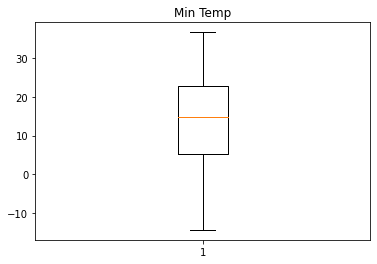

In [46]:
fig1, ax1 = plt.subplots()
ax1.set_title('Min Temp')
ax1.boxplot(dfWeather['min_temp'])
plt.show()

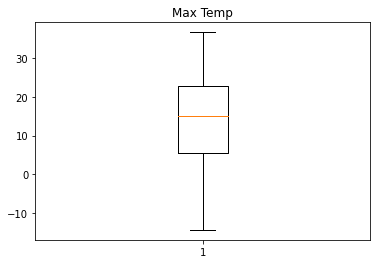

In [47]:
fig1, ax1 = plt.subplots()
ax1.set_title('Max Temp')
ax1.boxplot(dfWeather['max_temp'])
plt.show()

In [48]:
#fig1, ax1 = plt.subplots()
#ax1.set_title('isPrecip')
#ax1.boxplot(dfWeather["isPrecip"])
#plt.show()

#### Merge the prepared Weatherdata into dfPhiladelphia

In [49]:
# merge
dfPhiladelphia = pd.merge(dfPhiladelphia, dfWeather, left_on="start_time_for_weather_merge", right_on="date_time", how="left")
dfPhiladelphia.drop(columns = 'date_time', inplace = True)

# rename
dfPhiladelphia.rename(columns={"start_time_for_weather_merge": "start_time_hourly"}, inplace = True)
dfPhiladelphia.rename(columns={"end_time_for_weather_merge": "end_time_hourly"}, inplace = True)

# reformat to only hour & integer
dfPhiladelphia['start_time_hourly'] = dfPhiladelphia['start_time_hourly'].dt.hour
dfPhiladelphia['end_time_hourly'] = dfPhiladelphia['end_time_hourly'].dt.hour

## 1.3 Additional Features
- in this section, we will add additional features, we could use for tasks 2 (Descriptive analytics) & 3 (Cluster Analysis)

###**FEATURE: `numOfRentedBikes` (Total system-level demand hourly)**

In [50]:
########## Create dfNumOfRentedBikes
#dfNumOfRentedBikes = dfPhiladelphia[["start_date" , "start_time_hourly"]]
#dfNumOfRentedBikes['numOfRentedBikes'] = 0
#dfNumOfRentedBikes.head()

In [51]:
# Calculate numOfRentedBikes for each start_date & start_time_hourly
#dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_date", "start_time_hourly"])['numOfRentedBikes'].count().reset_index()
#dfNumOfRentedBikes

In [52]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
#dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_date", "start_time_hourly"], how="left")
#dfPhiladelphia

**FEATURE: `dayOfWeek`**
- ######### The day of the week with Monday=0, Sunday=6.

In [53]:
dfPhiladelphia['dayOfWeek'] = pd.to_datetime(dfPhiladelphia["start_date"]).dt.day_name()
dfPhiladelphia.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_hourly,end_time_hourly,start_date,end_date,start_latitude,start_longitude,end_latitude,end_longitude,max_temp,min_temp,isPrecip,dayOfWeek
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",0,0,2019-01-01,2019-01-01,39.94509,-75.14250,39.945170,-75.159930,6.950,6.4,True,Tuesday
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",0,1,2019-01-01,2019-01-01,39.94733,-75.14403,39.945170,-75.159930,6.950,6.4,True,Tuesday
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,1,1,2019-01-01,2019-01-01,39.97195,-75.13445,39.953820,-75.142630,7.075,6.8,True,Tuesday
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",1,1,2019-01-01,2019-01-01,39.96716,-75.17001,39.977139,-75.179398,7.075,6.8,True,Tuesday
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,1,1,2019-01-01,2019-01-01,39.95081,-75.16953,39.940610,-75.149580,7.075,6.8,True,Tuesday


**FEATURE: `isWeekend`**

In [54]:
def isWeekend(dayOfWeek):
    if(dayOfWeek in ["Saturday","Sunday"]):
        return True
    else:
        return False

In [55]:
dfPhiladelphia["isWeekend"] = dfPhiladelphia["dayOfWeek"].map(isWeekend)

**FEATURE: `isHoliday`**
- You need to install holidays

In [56]:
#pip install holidays

In [57]:
from datetime import date
import holidays

# Select country
us_holidays = holidays.US()
us_holidays

holidays.country_holidays('US')

In [58]:
dfPhiladelphia = dfPhiladelphia.assign(isHoliday=lambda x: x["start_date"].apply(lambda h: h in us_holidays))

**FEATURE: `season`**

In [59]:
# Returns the day of the year
def day_match(ts):
    return pd.Period(ts, freq='D').day_of_year

#seasons = {'spring': (start='2019-03-20', end='2019-06-20'),
#           'summer': (start='2019/06/21', end='2019/09/22'),
#           'autumn': (start='2019/09/23', end='2019/12/21'),
#           'winter': rest}

# Create Array to map days to seasons (1 - 4)
seasons = ['winter' for i in range(0,78)]
seasons.extend('spring' for i in range(0,93))
seasons.extend('summer' for i in range(0,94))
seasons.extend('autumn' for i in range(0,90))
seasons.extend('winter' for i in range(0,10))

# Create dictionary for lambda expression
day_to_season = {}
for i in range(0,365):
    day_to_season[i+1] = seasons[i]
    
# Map start_date to day of the year (day_match) and afterwards map this to seasonnames (day_to_season)
dfPhiladelphia["season"] = dfPhiladelphia["start_date"].map(day_match).map(day_to_season)

In [60]:
print("In 2019 there were:\n", 
      "•", pd.Period("2019-03-19").day_of_year + (pd.Period("2019-12-31").day_of_year - pd.Period("2019/12/21").day_of_year), "winter days\n", 
      "•", pd.Period("2019/06/20").day_of_year - pd.Period("2019-03-19").day_of_year, "spring days\n",
      "•", pd.Period("2019/09/22").day_of_year - pd.Period("2019/06/20").day_of_year, "summer days\n",
      "•", pd.Period("2019/12/21").day_of_year - pd.Period("2019/09/22").day_of_year, "autumn days\n")

In 2019 there were:
 • 88 winter days
 • 93 spring days
 • 94 summer days
 • 90 autumn days



**FEATURE: `isRushhour`**
- Wikipedia: Rush hour may be 5–9 AM (5:00–9:00) and 4–8 PM (sometimes from 4-9 PM) (16:00–20:00 (sometimes from 16:00-21:00))
- TomTom: https://www.tomtom.com/traffic-index/philadelphia-traffic/#:~:text=2020-,2019,-Best%20time%20to
- We took the TomTom statistics for deciding, when rushhour is starting and ending, since it is tailored for Philadelphia 2019 traffic

In [61]:
# Create feature isRushour
def isRushhour(time):
    if (time in [7,8,9,16,17,18,19]):
        return True
    else: 
        return False

dfPhiladelphia['isRushhour'] = dfPhiladelphia['start_time_hourly'].apply(lambda x:isRushhour(x))
dfPhiladelphia.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_hourly,end_time_hourly,...,end_latitude,end_longitude,max_temp,min_temp,isPrecip,dayOfWeek,isWeekend,isHoliday,season,isRushhour
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",0,0,...,39.945170,-75.159930,6.950,6.4,True,Tuesday,False,True,winter,False
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",0,1,...,39.945170,-75.159930,6.950,6.4,True,Tuesday,False,True,winter,False
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,1,1,...,39.953820,-75.142630,7.075,6.8,True,Tuesday,False,True,winter,False
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",1,1,...,39.977139,-75.179398,7.075,6.8,True,Tuesday,False,True,winter,False
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,1,1,...,39.940610,-75.149580,7.075,6.8,True,Tuesday,False,True,winter,False


**FEATURE: `tripduration_sec`**

In [62]:
dfPhiladelphia["tripduration_sec"] = (pd.to_datetime(dfPhiladelphia["end_time"]) - pd.to_datetime(dfPhiladelphia["start_time"])).dt.seconds

In [63]:
dfPhiladelphia.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_hourly,end_time_hourly,...,end_longitude,max_temp,min_temp,isPrecip,dayOfWeek,isWeekend,isHoliday,season,isRushhour,tripduration_sec
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",0,0,...,-75.159930,6.950,6.4,True,Tuesday,False,True,winter,False,480
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",0,1,...,-75.159930,6.950,6.4,True,Tuesday,False,True,winter,False,420
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,1,1,...,-75.142630,7.075,6.8,True,Tuesday,False,True,winter,False,780
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",1,1,...,-75.179398,7.075,6.8,True,Tuesday,False,True,winter,False,540
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,1,1,...,-75.149580,7.075,6.8,True,Tuesday,False,True,winter,False,720


**FEATURE: `tripLengthDistance`**

In [64]:
# MISSING

**FEATURE: `start_week & start_month`**

In [66]:
# also add start_week & start_month, which we will use later for merges and which could be useful as x-axis in Task 2
dfPhiladelphia['start_week'] = dfPhiladelphia['start_time'].dt.round("H").dt.isocalendar()["week"]
## The month as January=1, December=12.
dfPhiladelphia['start_month'] = dfPhiladelphia['start_time'].dt.round("H").dt.month

**FEATURE: `numOfRentedBikesHourly` (Total system-level demand!)**

In [67]:
# Create temporary dataframe dfNumOfRentedBikes
dfNumOfRentedBikes = dfPhiladelphia[["start_date" , "start_time_hourly"]]
dfNumOfRentedBikes['numOfRentedBikesHourly'] = 0
dfNumOfRentedBikes.head()

<ipython-input-67-5f83bd70d30f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNumOfRentedBikes['numOfRentedBikesHourly'] = 0


,start_date,start_time_hourly,numOfRentedBikesHourly
0,2019-01-01,0,0
1,2019-01-01,0,0
2,2019-01-01,1,0
3,2019-01-01,1,0
4,2019-01-01,1,0


In [68]:
# Calculate numOfRentedBikesHourly for each start_date & start_time_hourly
dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_date", "start_time_hourly"])['numOfRentedBikesHourly'].count().reset_index()
dfNumOfRentedBikes

,start_date,start_time_hourly,numOfRentedBikesHourly
0,2019-01-01,0,2
1,2019-01-01,1,8
2,2019-01-01,2,12
3,2019-01-01,3,9
4,2019-01-01,4,4
...,...,...,...
8632,2019-12-31,20,47
8633,2019-12-31,21,39
8634,2019-12-31,22,33
8635,2019-12-31,23,28


In [69]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_date", "start_time_hourly"], how="left")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_hourly,end_time_hourly,...,isPrecip,dayOfWeek,isWeekend,isHoliday,season,isRushhour,tripduration_sec,start_week,start_month,numOfRentedBikesHourly
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",0,0,...,True,Tuesday,False,True,winter,False,480,1,1,2
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",0,1,...,True,Tuesday,False,True,winter,False,420,1,1,2
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,1,1,...,True,Tuesday,False,True,winter,False,780,1,1,8
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",1,1,...,True,Tuesday,False,True,winter,False,540,1,1,8
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,1,1,...,True,Tuesday,False,True,winter,False,720,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733476,2019-12-31 23:28:50,2020-01-01 00:15:08,3192,3070,16508,Indego365,2nd & Fairmount,"Spring Garden Station, MFL",23,0,...,False,Tuesday,False,False,winter,False,2778,1,12,28
733477,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,23,0,...,False,Tuesday,False,False,winter,False,227,1,12,28
733478,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,0,0,...,False,Wednesday,False,True,winter,False,449,1,1,3
733479,2019-12-31 23:52:44,2020-01-01 00:01:31,3182,3028,17805,Indego365,17th & Sansom,4th & Bainbridge,0,0,...,False,Wednesday,False,True,winter,False,527,1,1,3


**FEATURE: `numOfRentedBikesDaily` (Total system-level demand!)**

In [70]:
# Overwrite temporary dataframe dfNumOfRentedBikes
dfNumOfRentedBikes = dfPhiladelphia[["start_date"]]
dfNumOfRentedBikes['numOfRentedBikesDaily'] = 0
dfNumOfRentedBikes.head()

<ipython-input-70-c166de7ebfa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNumOfRentedBikes['numOfRentedBikesDaily'] = 0


,start_date,numOfRentedBikesDaily
0,2019-01-01,0
1,2019-01-01,0
2,2019-01-01,0
3,2019-01-01,0
4,2019-01-01,0


In [71]:
# Calculate numOfRentedBikesDaily for each start_date
dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_date"])['numOfRentedBikesDaily'].count().reset_index()
dfNumOfRentedBikes

,start_date,numOfRentedBikesDaily
0,2019-01-01,797
1,2019-01-02,1164
2,2019-01-03,1382
3,2019-01-04,1464
4,2019-01-05,506
...,...,...
361,2019-12-28,960
362,2019-12-29,543
363,2019-12-30,570
364,2019-12-31,1189


In [72]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_date"], how="left")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_hourly,end_time_hourly,...,dayOfWeek,isWeekend,isHoliday,season,isRushhour,tripduration_sec,start_week,start_month,numOfRentedBikesHourly,numOfRentedBikesDaily
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",0,0,...,Tuesday,False,True,winter,False,480,1,1,2,797
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",0,1,...,Tuesday,False,True,winter,False,420,1,1,2,797
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,1,1,...,Tuesday,False,True,winter,False,780,1,1,8,797
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",1,1,...,Tuesday,False,True,winter,False,540,1,1,8,797
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,1,1,...,Tuesday,False,True,winter,False,720,1,1,8,797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733476,2019-12-31 23:28:50,2020-01-01 00:15:08,3192,3070,16508,Indego365,2nd & Fairmount,"Spring Garden Station, MFL",23,0,...,Tuesday,False,False,winter,False,2778,1,12,28,1189
733477,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,23,0,...,Tuesday,False,False,winter,False,227,1,12,28,1189
733478,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,0,0,...,Wednesday,False,True,winter,False,449,1,1,3,3
733479,2019-12-31 23:52:44,2020-01-01 00:01:31,3182,3028,17805,Indego365,17th & Sansom,4th & Bainbridge,0,0,...,Wednesday,False,True,winter,False,527,1,1,3,3


**FEATURE: `numOfRentedBikesWeekly` (Total system-level demand!)**

In [73]:
# Overwrite temporary dataframe dfNumOfRentedBikes
dfNumOfRentedBikes = dfPhiladelphia[["start_week"]]
dfNumOfRentedBikes['numOfRentedBikesWeekly'] = 0
dfNumOfRentedBikes.head()

<ipython-input-73-426bfefd4dca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNumOfRentedBikes['numOfRentedBikesWeekly'] = 0


,start_week,numOfRentedBikesWeekly
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [74]:
# Calculate numOfRentedBikesWeekly for each start_week
dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_week"])['numOfRentedBikesWeekly'].count().reset_index()
dfNumOfRentedBikes

,start_week,numOfRentedBikesWeekly
0,1,7932
1,2,6942
2,3,6891
3,4,6036
4,5,5140
5,6,8173
6,7,6444
7,8,6562
8,9,6643
9,10,6304


In [75]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_week"], how="left")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_hourly,end_time_hourly,...,isWeekend,isHoliday,season,isRushhour,tripduration_sec,start_week,start_month,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",0,0,...,False,True,winter,False,480,1,1,2,797,7932
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",0,1,...,False,True,winter,False,420,1,1,2,797,7932
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,1,1,...,False,True,winter,False,780,1,1,8,797,7932
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",1,1,...,False,True,winter,False,540,1,1,8,797,7932
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,1,1,...,False,True,winter,False,720,1,1,8,797,7932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733476,2019-12-31 23:28:50,2020-01-01 00:15:08,3192,3070,16508,Indego365,2nd & Fairmount,"Spring Garden Station, MFL",23,0,...,False,False,winter,False,2778,1,12,28,1189,7932
733477,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,23,0,...,False,False,winter,False,227,1,12,28,1189,7932
733478,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,0,0,...,False,True,winter,False,449,1,1,3,3,7932
733479,2019-12-31 23:52:44,2020-01-01 00:01:31,3182,3028,17805,Indego365,17th & Sansom,4th & Bainbridge,0,0,...,False,True,winter,False,527,1,1,3,3,7932


**FEATURE: `numOfRentedBikesMonthly` (Total system-level demand!)**

In [76]:
# Overwrite temporary dataframe dfNumOfRentedBikes
dfNumOfRentedBikes = dfPhiladelphia[["start_month"]]
dfNumOfRentedBikes['numOfRentedBikesMonthly'] = 0
dfNumOfRentedBikes.head()

<ipython-input-76-3bbbeb47d367>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNumOfRentedBikes['numOfRentedBikesMonthly'] = 0


,start_month,numOfRentedBikesMonthly
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [77]:
# Calculate numOfRentedBikesMonthly for each start_month
dfNumOfRentedBikes = dfNumOfRentedBikes.groupby(["start_month"])['numOfRentedBikesMonthly'].count().reset_index()
dfNumOfRentedBikes

,start_month,numOfRentedBikesMonthly
0,1,29696
1,2,27500
2,3,37868
3,4,57254
4,5,66300
5,6,79988
6,7,83753
7,8,93809
8,9,93892
9,10,77628


In [78]:
# Merge dfNumOfRentedBikes into dfPhiladelphia
dfPhiladelphia = pd.merge(dfPhiladelphia, dfNumOfRentedBikes, on=["start_month"], how="left")
dfPhiladelphia

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,start_time_hourly,end_time_hourly,...,isHoliday,season,isRushhour,tripduration_sec,start_week,start_month,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly,numOfRentedBikesMonthly
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park",0,0,...,True,winter,False,480,1,1,2,797,7932,29696
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park",0,1,...,True,winter,False,420,1,1,2,797,7932,29696
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race,1,1,...,True,winter,False,780,1,1,8,797,7932,29696
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center",1,1,...,True,winter,False,540,1,1,8,797,7932,29696
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge,1,1,...,True,winter,False,720,1,1,8,797,7932,29696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733476,2019-12-31 23:28:50,2020-01-01 00:15:08,3192,3070,16508,Indego365,2nd & Fairmount,"Spring Garden Station, MFL",23,0,...,False,winter,False,2778,1,12,28,1189,7932,32990
733477,2019-12-31 23:29:57,2019-12-31 23:33:44,3086,3025,3326,Indego30,Broad & Christian,11th & Washington,23,0,...,False,winter,False,227,1,12,28,1189,7932,32990
733478,2019-12-31 23:49:14,2019-12-31 23:56:43,3052,3068,14555,Indego30,9th & Locust,Broad & Federal,0,0,...,True,winter,False,449,1,1,3,3,7932,29696
733479,2019-12-31 23:52:44,2020-01-01 00:01:31,3182,3028,17805,Indego365,17th & Sansom,4th & Bainbridge,0,0,...,True,winter,False,527,1,1,3,3,7932,29696


### Last integrity Checks

In [79]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733481 entries, 0 to 733480
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               733481 non-null  datetime64[ns]
 1   end_time                 733481 non-null  datetime64[ns]
 2   start_station_id         733481 non-null  int64         
 3   end_station_id           733481 non-null  int64         
 4   bike_id                  733481 non-null  int64         
 5   user_type                733481 non-null  object        
 6   start_station_name       733481 non-null  object        
 7   end_station_name         733481 non-null  object        
 8   start_time_hourly        733481 non-null  int64         
 9   end_time_hourly          733481 non-null  int64         
 10  start_date               733481 non-null  object        
 11  end_date                 733481 non-null  object        
 12  start_latitude  

In [80]:
# Test if null values are existing in dfPhiladelphia
len(dfPhiladelphia)-len(dfPhiladelphia.dropna())

0

There are no null values in dfPhiladelphia.

In [81]:
# Test if duplicate rows are existing in dfPhiladelphia
len(dfPhiladelphia)-len(dfPhiladelphia.drop_duplicates())

0

There are no duplicates in dfPhiladelphia.

### Order Features & Drop unnessecary columns

In [82]:
# Reorder the dataset & Take only necessary columns (implicit drop of unselected features)
dfPhiladelphia = dfPhiladelphia[['start_date', 
                                 'end_date', 
                                 'start_time_hourly', 
                                 'end_time_hourly', 
                                 'start_station_id',
                                 'end_station_id',
                                 'start_latitude',
                                 'start_longitude',
                                 'end_latitude',
                                 'end_longitude',
                                 'min_temp',
                                 'max_temp',
                                 'isPrecip',
                                 'user_type',
                                 'dayOfWeek',
                                 'isWeekend',
                                 'season',
                                 'isHoliday',
                                 'isRushhour',
                                 'tripduration_sec',
                                 #'tripLengthDistance',
                                 'numOfRentedBikesHourly',
                                 'numOfRentedBikesDaily',
                                 'numOfRentedBikesWeekly',
                                 'numOfRentedBikesMonthly',
                                 'start_week',
                                 'start_month',
                                 'start_station_name',
                                 'end_station_name'
                                ]]

dfPhiladelphia

,start_date,end_date,start_time_hourly,end_time_hourly,start_station_id,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,...,isRushhour,tripduration_sec,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly,numOfRentedBikesMonthly,start_week,start_month,start_station_name,end_station_name
0,2019-01-01,2019-01-01,0,0,3049,3007,39.94509,-75.142500,39.945170,-75.159930,...,False,480,2,797,7932,29696,1,1,Foglietta Plaza,"11th & Pine, Kahn Park"
1,2019-01-01,2019-01-01,0,1,3005,3007,39.94733,-75.144030,39.945170,-75.159930,...,False,420,2,797,7932,29696,1,1,"Welcome Park, NPS","11th & Pine, Kahn Park"
2,2019-01-01,2019-01-01,1,1,3166,3169,39.97195,-75.134450,39.953820,-75.142630,...,False,780,8,797,7932,29696,1,1,Frankford & Belgrade,2nd & Race
3,2019-01-01,2019-01-01,1,1,3058,3103,39.96716,-75.170010,39.977139,-75.179398,...,False,540,8,797,7932,29696,1,1,20th & Fairmount,"27th & Master, Athletic Recreation Center"
4,2019-01-01,2019-01-01,1,1,3182,3028,39.95081,-75.169530,39.940610,-75.149580,...,False,720,8,797,7932,29696,1,1,17th & Sansom,4th & Bainbridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733476,2019-12-31,2020-01-01,23,0,3192,3070,39.96207,-75.141113,39.960620,-75.139830,...,False,2778,28,1189,7932,32990,1,12,2nd & Fairmount,"Spring Garden Station, MFL"
733477,2019-12-31,2020-01-01,23,0,3086,3025,39.94019,-75.166910,39.937240,-75.161200,...,False,227,28,1189,7932,32990,1,12,Broad & Christian,11th & Washington
733478,2020-01-01,2020-01-01,0,0,3052,3068,39.94732,-75.156950,39.935490,-75.167110,...,False,449,3,3,7932,29696,1,1,9th & Locust,Broad & Federal
733479,2020-01-01,2020-01-01,0,0,3182,3028,39.95081,-75.169530,39.940610,-75.149580,...,False,527,3,3,7932,29696,1,1,17th & Sansom,4th & Bainbridge


### Our final dataset looks like this:

In [83]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733481 entries, 0 to 733480
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_date               733481 non-null  object 
 1   end_date                 733481 non-null  object 
 2   start_time_hourly        733481 non-null  int64  
 3   end_time_hourly          733481 non-null  int64  
 4   start_station_id         733481 non-null  int64  
 5   end_station_id           733481 non-null  int64  
 6   start_latitude           733481 non-null  float64
 7   start_longitude          733481 non-null  float64
 8   end_latitude             733481 non-null  float64
 9   end_longitude            733481 non-null  float64
 10  min_temp                 733481 non-null  float64
 11  max_temp                 733481 non-null  float64
 12  isPrecip                 733481 non-null  bool   
 13  user_type                733481 non-null  object 
 14  dayO

# [TEMPORARY] SHOW CORRELATION OF FEATURES TO PREDICTOR

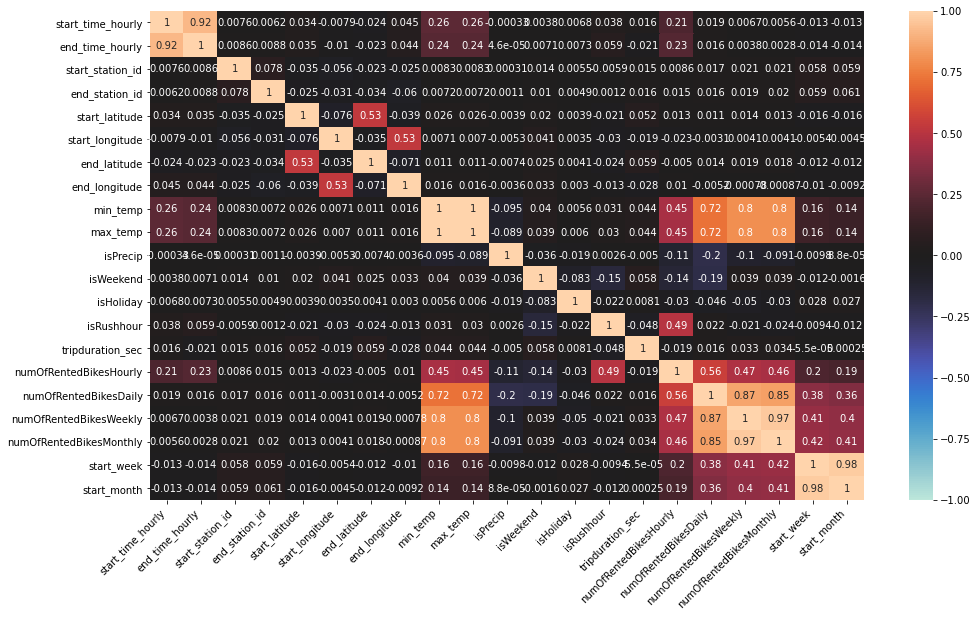

In [84]:
import seaborn as sns
corr = dfPhiladelphia.corr()
plt.figure(figsize = (16,9))
ax = sns.heatmap(corr, vmin = -1, vmax= 1, center = 0, annot=True)

ax.set_xticklabels(ax.get_xticklabels(),
                  rotation = 45,
                  horizontalalignment = 'right')

ax.set_yticklabels(ax.get_yticklabels(),
                   rotation =0,
                   horizontalalignment = 'right')

plt.show()

# [TEMPORARY] Export data set

In [85]:
dfPhiladelphia.to_csv("data/tmp/dfPhiladelphia.csv.zip",
                      index = False,
                      compression="zip")

In [89]:
# Vielleicht letzte 3 Rows deleten, wegen 2020

In [86]:
#NOTES: 

# TRIP SPEED; TRIP 



# (district)


# hour? dummys?
#4 predictive different features because of need of dummy variables

# Stations names NICHT als input feature verwenden!


# Feature Preparation for Tasks 2 & 3?, 

In [87]:
# datetime so früh wie möglich droppen

In [88]:
# Trips outside of Philadelphia